In [1]:
import os
from glob import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy import stats
import seaborn as sns

In [5]:
MAF = 'Underlying frequency'
RATIO = 'Frequencies observed in simulations'
COVERAGE = 'Coverage'
SIMULATION = 'Simulation'
ERROR = 'Simulation error'
                                    

sim_dir = '/data/projects/horsa/snp_simulation'

files = glob('%s/*/*/*.npy' % sim_dir)

analyses = {
    'dupl': 'PCR duplicates',
    'nodupl': 'No duplicates',
    'avg': 'Random selection'
}

recs = []
for f in files:
    items = f.split('/')
    maf, cov, analysis = int(items[-3]), int(items[-2]), analyses[items[-1][:-4]]
    ratios = np.load(f)
    for ratio in ratios:
        recs.append([maf, cov, analysis, ratio])
    
table = pd.DataFrame(recs)
table.columns = [MAF, COVERAGE, SIMULATION, RATIO]
table[MAF] = table[MAF] / 100
table[ERROR] = table[RATIO] - table[MAF]
table

,Underlying frequency,Coverage,Simulation,Frequencies observed in simulations,Simulation error
0,0.05,100,PCR duplicates,0.040000,-0.010000
1,0.05,100,PCR duplicates,0.060000,0.010000
2,0.05,100,PCR duplicates,0.040000,-0.010000
3,0.05,100,PCR duplicates,0.100000,0.050000
4,0.05,100,PCR duplicates,0.050000,0.000000
5,0.05,100,PCR duplicates,0.000000,-0.050000
6,0.05,100,PCR duplicates,0.060000,0.010000
7,0.05,100,PCR duplicates,0.050000,0.000000
8,0.05,100,PCR duplicates,0.050000,0.000000
9,0.05,100,PCR duplicates,0.117647,0.067647


/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<IPython.core.display.Javascript object>


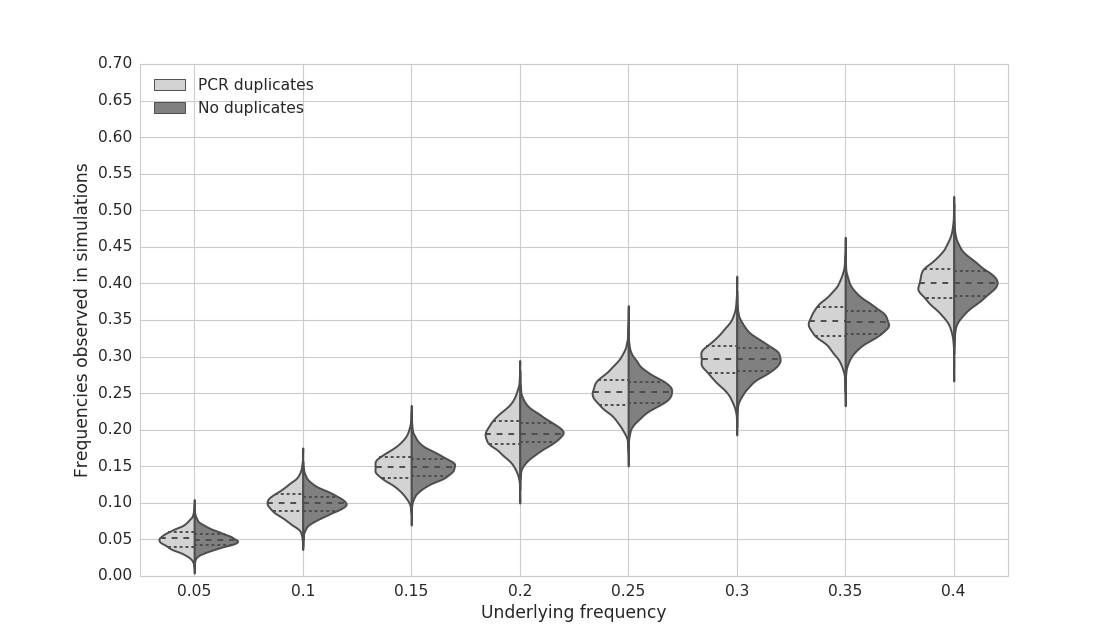

In [6]:
FONT_SIZE = 15
FIGSIZE = (14,8)

PLOT_COVERAGE = 350
MAX_MAF = 0.4
DISPLAY_ANALYSES = ['PCR duplicates', 'No duplicates']

mafs = table[table[COVERAGE] == PLOT_COVERAGE][table[MAF] <= MAX_MAF][table.Simulation.isin(DISPLAY_ANALYSES)]

sns.set_context('paper')
sns.set(style="whitegrid", font_scale=1.4, color_codes=True)


plt.figure(figsize=FIGSIZE)
sns.violinplot(x=MAF, y=RATIO, hue=SIMULATION, data=mafs, split=True,
               inner="quart", palette={"PCR duplicates": "lightgrey", "No duplicates": "grey"})


plt.ylim(0, .7)

ymin, ymax = plt.ylim()
plt.yticks(np.arange(ymin, ymax+0.0001, 0.05))
plt.grid(axis='x')
plt.legend(loc=2)

In [1]:
PLOT_COVERAGES = [100, 250, 400]
PLOT_MAFS = [0.05, 0.2, 0.35, 0.5, 0.65, 0.8, 0.95]
mafs = table[table[COVERAGE].isin(PLOT_COVERAGES)][table[MAF].isin(PLOT_MAFS)][table[SIMULATION].isin(DISPLAY_ANALYSES)]

g = sns.factorplot(x=MAF, y=ERROR, hue=SIMULATION, row=COVERAGE, data=mafs, 
                   split=True, inner="quart", kind="violin",
                   aspect=4, size=3, legend_out=True, legend=False,
                   palette={"PCR duplicates": "lightgrey", "No duplicates": "grey"})

plt.savefig('/var/www/html/horsa/figures/simulations/simulation_09-28.png')

NameError: name 'table' is not defined

In [243]:
for i, a in enumerate(g.axes):
    a[0].grid(axis='x')
    if i != 1:
        a[0].set_ylabel('')

# Error rate

In [176]:
#for group, table.groupby(SIMULATION)
freqs = table[MAF].unique()
coverages = table[COVERAGE].unique()

def calc_errors(simulation):
    experiment = table[table[SIMULATION] == simulation]
    ITERS = 5000

    errors = np.zeros((len(freqs), len(coverages), ITERS))
    for i, maf in enumerate(freqs):
        for j, cov in enumerate(coverages):
            exp = experiment[(experiment[COVERAGE] == cov) & (experiment[MAF] == maf)]
            assert len(exp) == ITERS, maf + cov
            for k, e in enumerate(exp[RATIO]):
                errors[i, j, k] = np.abs(e - maf)
    return errors

de = calc_errors('PCR duplicates')
ue = calc_errors('No duplicates')
        

<IPython.core.display.Javascript object>


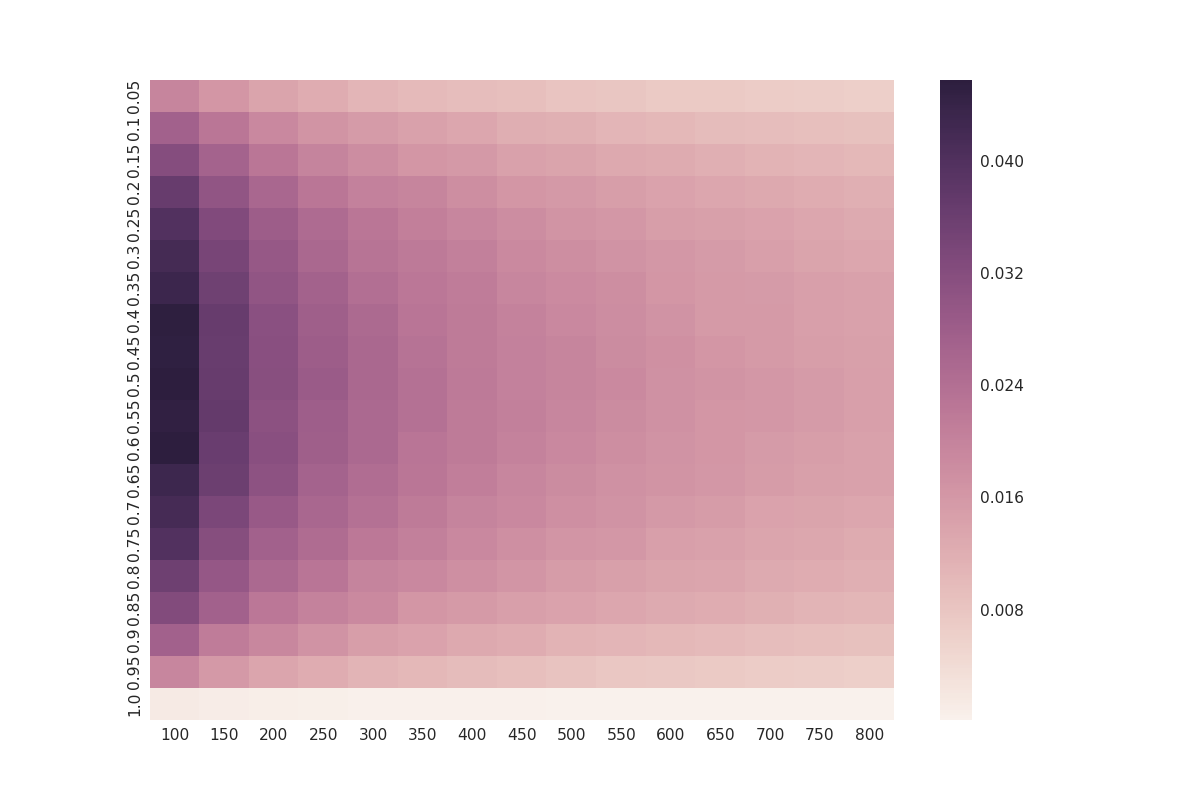

<IPython.core.display.Javascript object>


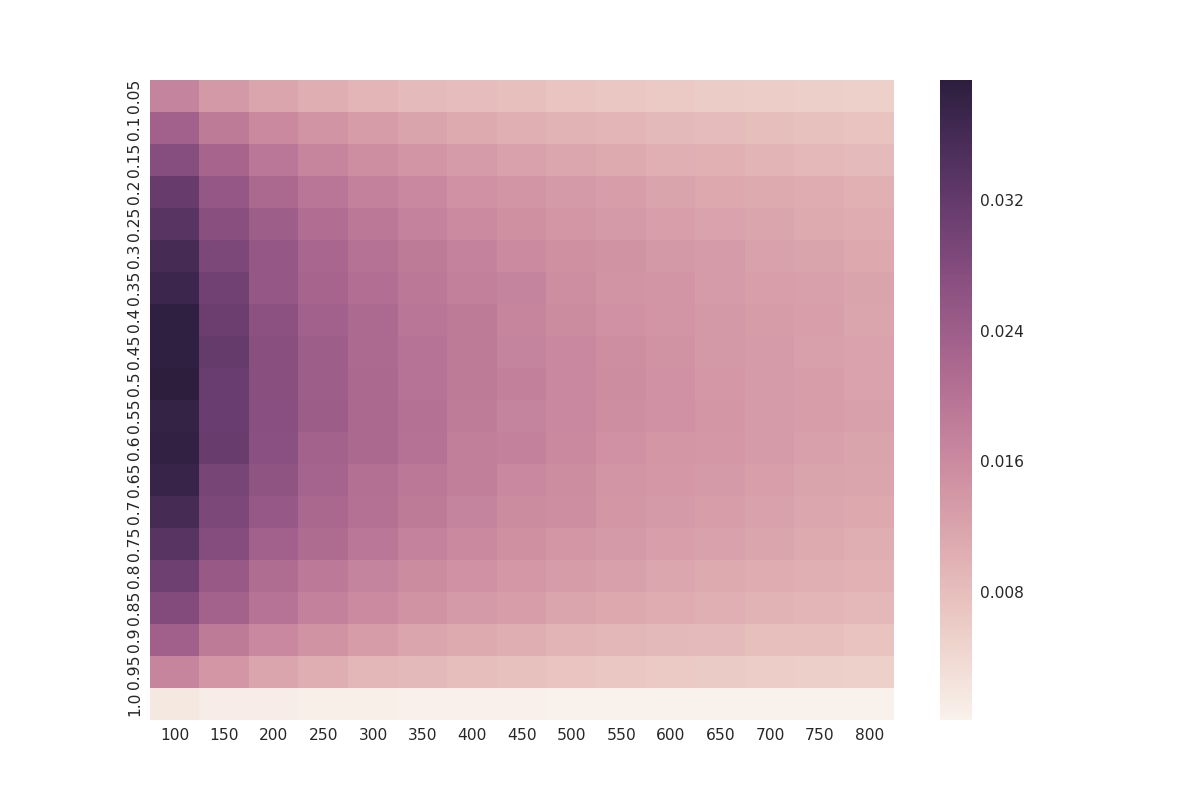

In [186]:
def plot_errors(errors):
    plt.figure(figsize=(15, 10))
    sns.heatmap(errors, xticklabels=coverages, yticklabels=freqs)
    
ade, aue = np.average(de, axis=2), np.average(ue, axis=2)
plot_errors(ade)
plot_errors(aue)

In [217]:
np.average(ade / aue), np.average(ade) / np.average(aue)

(1.1719626366296803, 1.1777007083583901)

In [214]:
d = table[(table[SIMULATION] == 'PCR duplicates') & (table[MAF] == 0.15)]
u = table[(table[SIMULATION] == 'Random selection') & (table[MAF] == 0.15)]

dd = (d[MAF] - d[RATIO]).abs().mean()
uu = (u[MAF] - u[RATIO]).abs().mean()
dd, uu, dd / uu

(0.016807874073989839, 0.015367757306112464, 1.0937102752985677)

In [213]:
table[SIMULATION].unique()

array(['PCR duplicates', 'Random selection', 'No duplicates'], dtype=object)